# Problema de la Mochila

A continuación se muestran los diferentes pasos de la solución al Problema de La Mochila empleando la librería [DEAP](https://github.com/DEAP/deap) de Python

## Descripcion del problema
Se puede encontrar una descripción completa del problema de la mochila en el siguiente [enlace](https://es.wikipedia.org/wiki/Problema_de_la_mochila).

In [110]:
import random
import numpy as np

import matplotlib.pyplot as plt

from deap import base, creator
from deap import tools
from deap import algorithms

## Datos del problema
Por simplificación, aquí se incluyen ya los vectores que contienen los datos del problema. En muchos casos, es probable que tengamos que extraerlos de un fichero externo.

In [111]:
#Trabajamos con 5 objetos
values = [10,200,50,120,200] # valor de cada objeto
weights = [45,80,25,15,75] # peso de cada objeto
knapsackMax = 200 # peso maximo que se puede cargar en la mochila

## Configuración de la Solución

### Estructuras de datos de configuración

En primer lugar, se crea el objeto donde iremos guardando las diferentes configuraciones

In [112]:
toolbox = base.Toolbox()

### Configuración de los Individuos

Esta configuración dependerá del problema. Queda a decisión del programador la definición de cada individuo.

1. En primer lugar Se configura el fitness que se va a emplear en los individuos  
En este caso se configura para:  
    a.buscar un único objetivo: es una tupla de solo un numero  
    b.maximizar ese objetivo (se multiplica por un positivo)  
    
2. Se configura el individuo para que utilice la descripción anterior de fitness dentro de los individuos

In [113]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

1. Se configura el atributo ("attribute") con el que se generará cada gen del individuo
2. El individuo se crea como una lista (o repeticion) de "attribute", definido justo antes
3. La población se crea como una lista de "individual", definido justo antes

In [114]:
# Ejemplo de Genotipo cuyos genes son de tipo booleano '''
toolbox.register("attribute", random.randint, 0, 1)
#Tendrá una longitud de 5 atributos 
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attribute, n=5)
toolbox.register("population", tools.initRepeat, list, toolbox.individual) 

Se comprueba que está correctamente definido. 
No es necesario incluir esta celda en el experimento final.

In [115]:
# Se genera un único individuo
ind = toolbox.individual()
print("Individuo: ",ind)
    
# Se inicializa la poblacion. Tendrá un total de 10 individuos. Se genera como una lista de individuos.
pop = toolbox.population(n=10)

# Se imprime la población: 10 individuos de 5 genes cada uno
print("Poblacion: ",pop)

Individuo:  [1, 1, 0, 1, 0]
Poblacion:  [[0, 1, 0, 0, 0], [1, 1, 1, 0, 1], [0, 1, 0, 1, 1], [1, 0, 1, 1, 1], [0, 1, 1, 0, 0], [0, 1, 0, 1, 0], [0, 1, 1, 0, 0], [0, 0, 1, 0, 1], [0, 1, 0, 0, 0], [1, 0, 1, 0, 1]]


## Evaluación de la Adaptación

Para poder ejecutar el algoritmo genético, tendremos que implementar una función que, dado un individuo, nos indique (de manera numérica) cómo de adaptado está a la solución que estamos buscando.

In [116]:
def evalKnapsack(individual):

    value = 0.0
    weight = 0.0
    
    # Producto vectorial de un individuo (boolean) por los datos (float)
    # Multiplica cada bit del individuo por el valor correspondiente en el vector de datos
    # y finalmente hace la suma de todos
    value = np.dot(individual,values)
    weight = np.dot(individual,weights) # Mismo cáculo para el vector de pesos

    # Se penaliza en caso de que el peso de la mochila exceda el maximo
    diff = knapsackMax - weight
    if(diff < 0):
         value = value + (diff * 10) 
            
    return value, 

## Configuración del algoritmo genético

Ya hemos configurado todas las partes diréctamente relacionadas con el problema a resolver. A continuación vamos a configurar cómo queremos que la librería DEAP realice la evolución de los individuos que representan soluciones hasta encontrar la más adecuada.
Esta parte consiste en seleccionar que procedimientos queremos emplear en cada una de las partes del ciclo evolutivo.

In [117]:
# Se seleccionan procedimiento standard para cruce, mutacion y seleccion. Se recomienda repasar el material visto en teoría.
toolbox.register("select", tools.selTournament, tournsize=3) # seleccion
toolbox.register("mate", tools.cxOnePoint) # cruce
toolbox.register("mutate", tools.mutFlipBit, indpb=0.2) # mutacion

# Se define cómo se evaluará cada individuo
# En este caso, se hará uso de la función de evaluación que se ha definido en la sección anterior
toolbox.register("evaluate", evalKnapsack)

## Configuración de las estadísticas

Si deseamos obtener algún valor para ayudarnos a comprender cómo avanza el algoritmo, debemos hacerlo en el objeto del tipo Statistics. Éste calcula resúmenes sobre la función de adaptación que contienen el conjunto de los individuos de la población.

In [118]:
# Se configura que estadísticas se quieren analizar 
stats = tools.Statistics(lambda ind: ind.fitness.values) 
stats.register("avg", np.mean) 
stats.register("std", np.std) 
stats.register("min", np.min) 
stats.register("max", np.max) 

## Ejecución del Algoritmo

Se ejecuta el ciclo evolutivo durante el número de generaciones determindo.
Se debe tener en cuenta que, al ser un ejemplo, el problema es muy simple y no es necesario iterar durante mucho tiempo. En los casos reales, tanto el tamaño de la población, como el número de generaciones probablemente deban ser mucho mayores.

In [119]:
# Se genera una población inicial. El tamaño será siempre de 10 individuos.
population = toolbox.population(n=10)

# Se llama al algoritmo que permite la evolucion de las soluciones
population, logbook = algorithms.eaSimple(population, toolbox, 
                                    cxpb=0.5, mutpb=0.2, # Probabilidades de cruce y mutacion
                                    ngen=20, verbose=False, stats=stats) # Numero de generaciones a completar y estadisticas a recoger

# Por cada generación, la estructura de logbook va almacenando un resumen de los avances del algoritmo.
print("El resultado de la evolución es: ")
print(logbook)

print("La mejor solucion encontrada es: ")
print(tools.selBest(population,1)[0])

El resultado de la evolución es: 
gen	nevals	avg	std    	min	max
0  	10    	319	136.635	50 	570
1  	7     	393	170.649	120	570
2  	7     	516	82.8493	370	570
3  	9     	525	90.6918	320	570
4  	8     	491	130.265	180	570
5  	4     	545	75     	320	570
6  	3     	525	90.6918	320	570
7  	7     	528	78.5875	320	570
8  	4     	534	72.5534	370	570
9  	4     	570	0      	570	570
10 	3     	570	0      	570	570
11 	8     	495	105.475	320	570
12 	6     	565	15     	520	570
13 	10    	570	0      	570	570
14 	7     	545	60.208 	370	570
15 	7     	510	128.062	170	570
16 	4     	519	118.528	180	570
17 	5     	545	75     	320	570
18 	9     	545	75     	320	570
19 	9     	558	36     	450	570
20 	5     	540	74.8331	320	570
La mejor solucion encontrada es: 
[0, 1, 1, 1, 1]


## Representación de los resultados
Por último, se pueden obtener gráficas empleando los datos de las estadísticas recogidas, para visualizarlos de forma más intuitiva.

[]

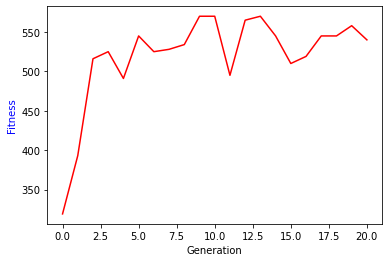

In [120]:
# Se recuperan los datos desde el log
gen = logbook.select("gen")
avgs = logbook.select("avg")
    
# Se establece una figura para dibujar
fig = plt.figure()
    
# Se representa la media del valor de fitness por cada generación
ax1 = plt.gca()
line1 = ax1.plot(gen, avgs, "r-", label="Average Fitness")    
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")
    
plt.plot()